In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
meddata = pd.read_csv("Insurance.csv")
meddata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
meddata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='sex', ylabel='charges'>

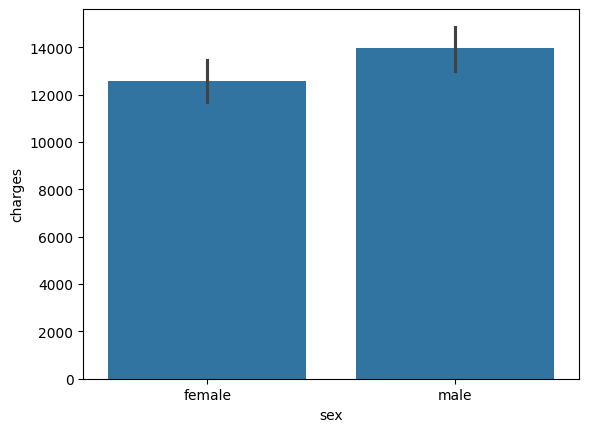

In [4]:
sns.barplot(x = 'sex', y ='charges', data = meddata)

<Axes: xlabel='sex', ylabel='charges'>

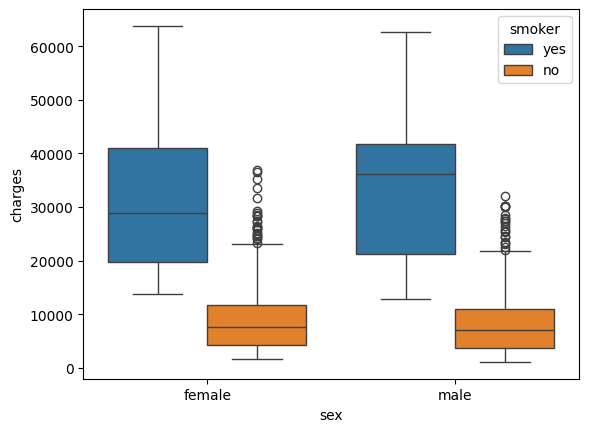

In [5]:
sns.boxplot(x= 'sex', y='charges', hue='smoker', data = meddata)

/tmp/ipython-input-1632767954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(meddata['charges'], bins = 50)


<Axes: xlabel='charges', ylabel='Density'>

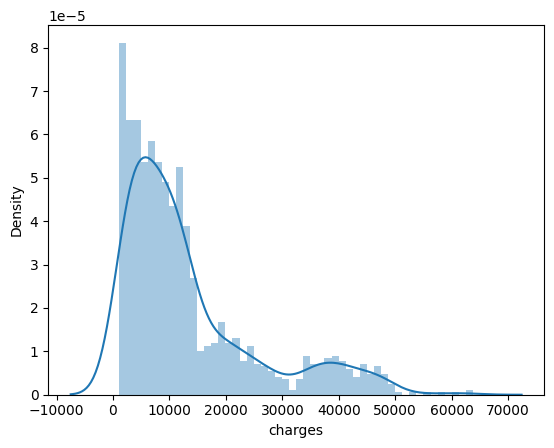

In [6]:
sns.distplot(meddata['charges'], bins = 50)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
meddata['sex'] =  le.fit_transform(meddata['sex'])
meddata['region'] =  le.fit_transform(meddata['region'])
meddata['smoker'] =  le.fit_transform(meddata['smoker'])
print(meddata)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [8]:
X = meddata.iloc[:,:-1].values
y = meddata.iloc[:,-1].values
print(X)
print("\n")
print(y)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
tr_r2 = model.score(X_train,y_train)
print("Training R^2 = ",tr_r2)
ts_r2 = model.score(X_test,y_test)
print("Testing R^2 = ",ts_r2)

Training R^2 =  0.7417049283233981
Testing R^2 =  0.7833463107364539


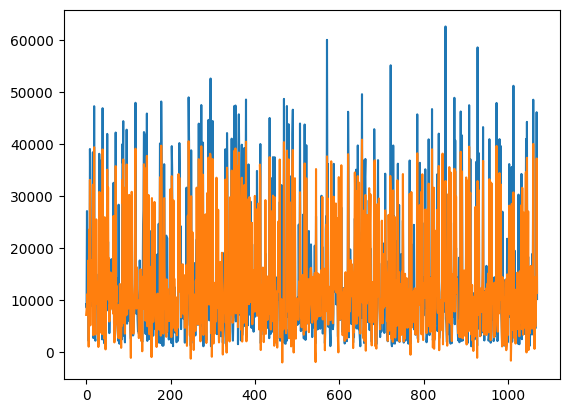

In [ ]:
y_pred=model.predict(X_train)
plt.plot(y_train)
plt.plot(y_pred)
plt.show()

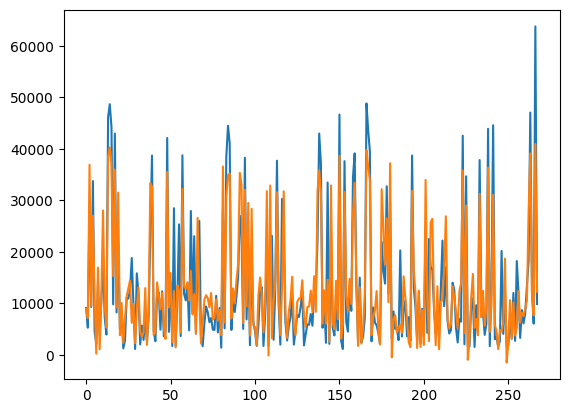

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
tr_r2 = model.score(X_train,y_train)
print("Training R^2 = ",tr_r2)
ts_r2 = model.score(X_test,y_test)
print("Testing R^2 = ",ts_r2)

Training R^2 =  0.9747653017161362
Testing R^2 =  0.8681905668038341


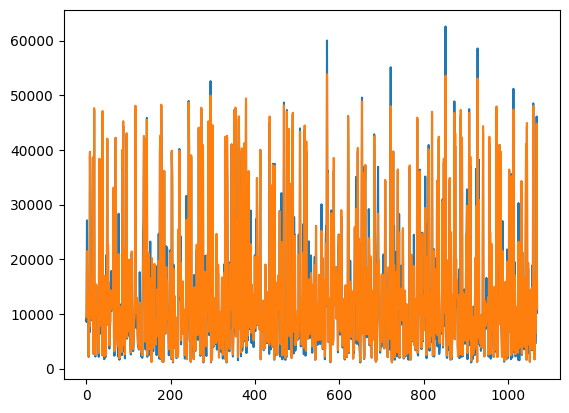

In [ ]:
y_pred = model.predict(X_train)
plt.plot(y_train)
plt.plot(y_pred)
plt.show()

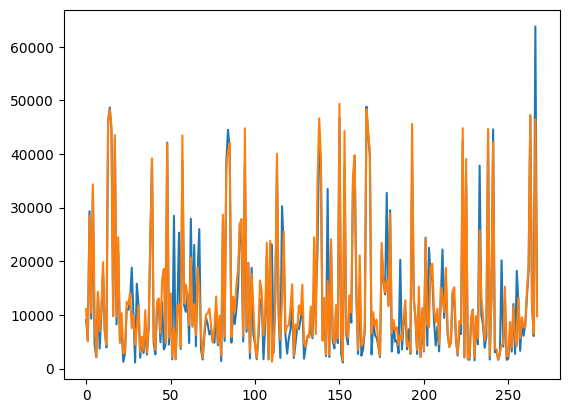

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.show()